<a href="https://colab.research.google.com/github/Lucas-Siade/Data-Science/blob/main/Codes/N%C3%A3o%20Supervisionado/DS%20-%20t-SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exemplo**

## **Bibliotecas**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

## **Dataset**

In [15]:
datasetTSNE = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science/Dataset - Iris.csv")

#DEFINIÇÃO DAS COLUNAS
datasetTSNE.drop(['Id'], axis=1, inplace=True)

datasetTSNE.rename(columns={
    'SepalLengthCm': 'Comprimento da Sépala',
    'SepalWidthCm': 'Largura da Sépala',
    'PetalLengthCm': 'Comprimento da Pétala',
    'PetalWidthCm': 'Largura da Pétala',
    'Species': 'Espécie',
}, inplace=True)

display(datasetTSNE.head())

,Comprimento da Sépala,Largura da Sépala,Comprimento da Pétala,Largura da Pétala,Espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


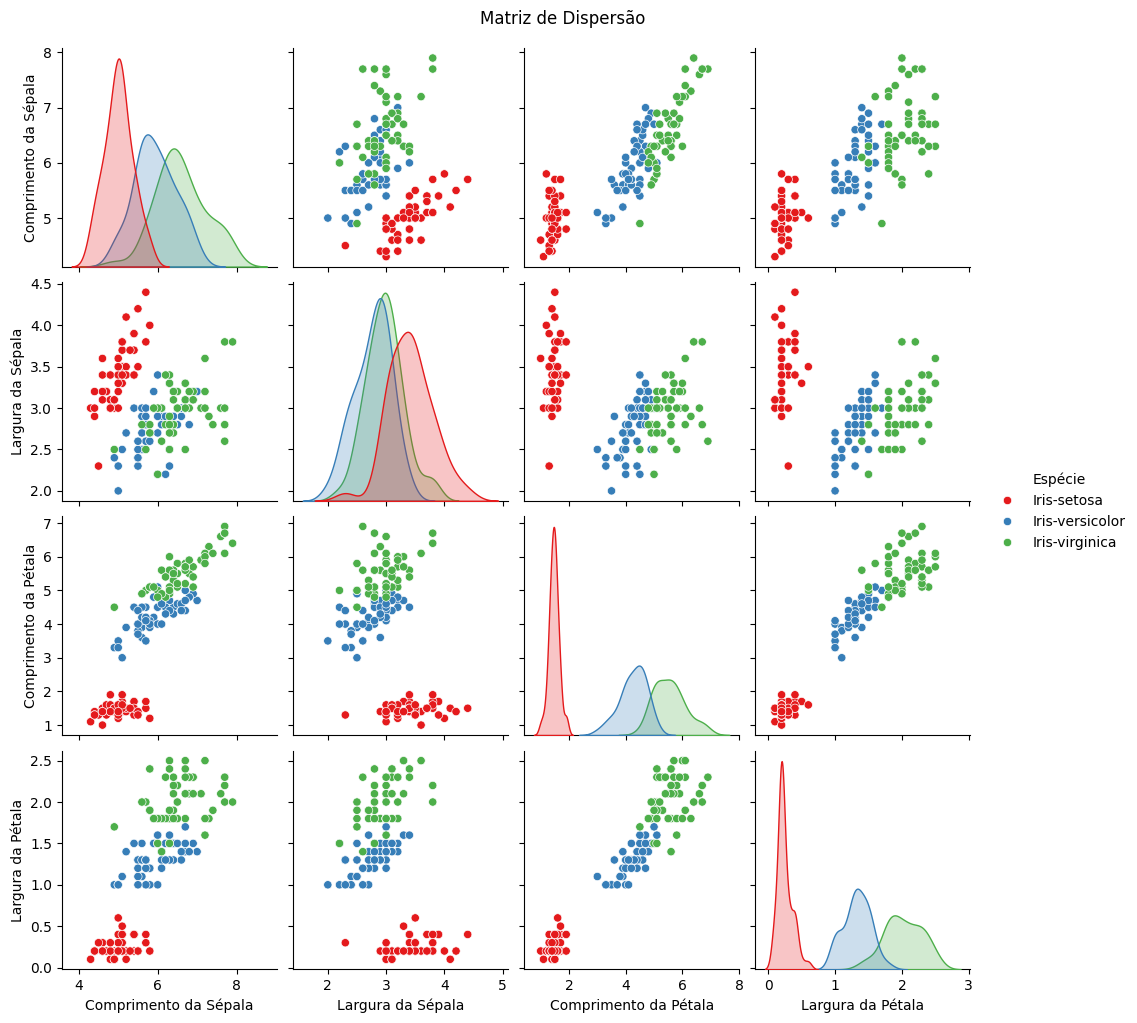

In [16]:
sns.pairplot(datasetTSNE, hue='Espécie', palette='Set1')
plt.suptitle('Matriz de Dispersão', y=1.02)
plt.show()

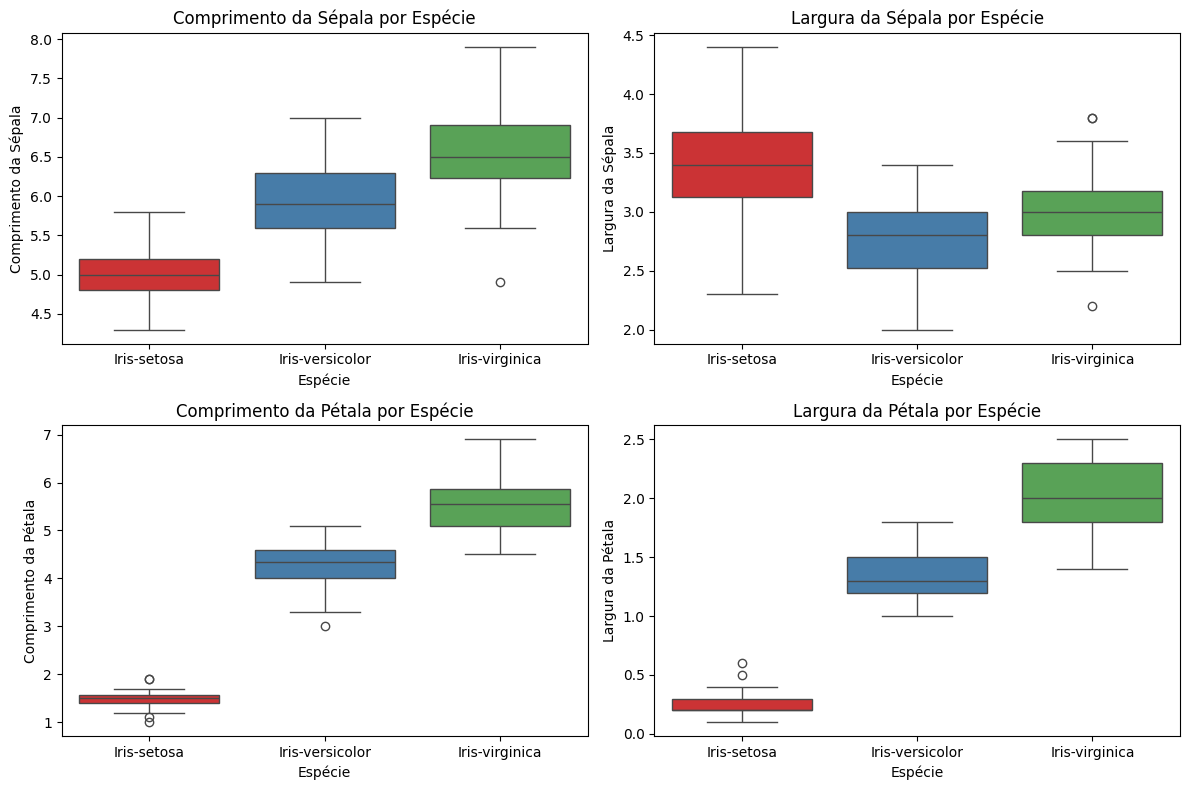

In [17]:
plt.figure(figsize=(12, 8))

for i, coluna in enumerate(datasetTSNE.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=datasetTSNE, x='Espécie', y=coluna, hue='Espécie', palette='Set1', legend=False)
    plt.title(f'{coluna} por Espécie')

plt.tight_layout()
plt.show()

## **Modelo**

In [18]:
#DEFINIR VARIÁVEIS
XTSNE = datasetTSNE.drop(["Espécie"], axis=1)

scaler = StandardScaler()
XTSNE_scaled = scaler.fit_transform(XTSNE)

#TREINO DO MODELO
modelTSNE = TSNE(n_components=2, perplexity=30, random_state=42)
XTSNE_scaled = modelTSNE.fit_transform(XTSNE_scaled)

## **Extra**

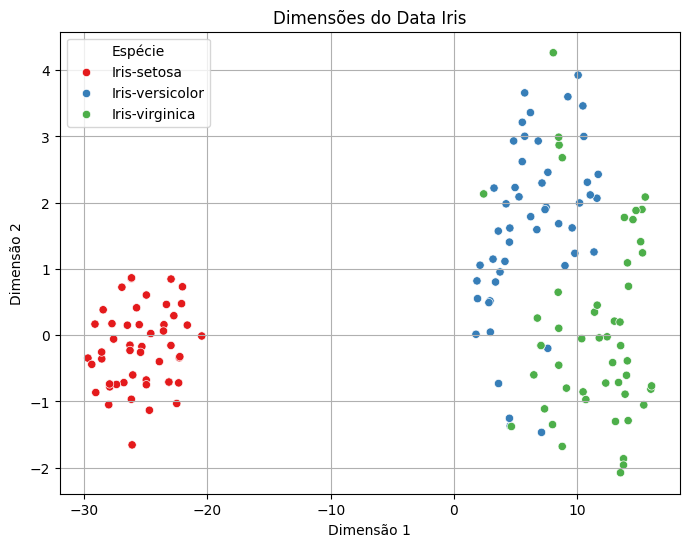

In [19]:
YTSNE = datasetTSNE['Espécie']

DFTSNE = pd.DataFrame(XTSNE_scaled, columns=["DIM 1", "DIM 2"])
DFTSNE["Espécie"] = YTSNE.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=DFTSNE, x="DIM 1", y="DIM 2", hue="Espécie", palette="Set1")
plt.title("Dimensões do Data Iris")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.grid(True)

plt.show()

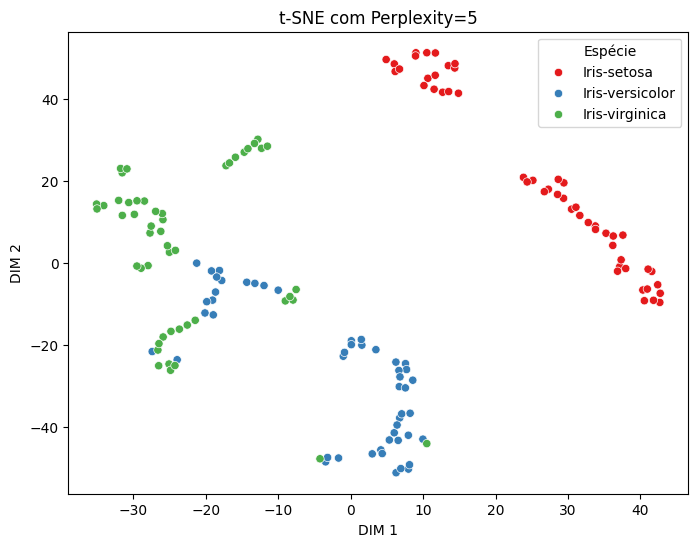

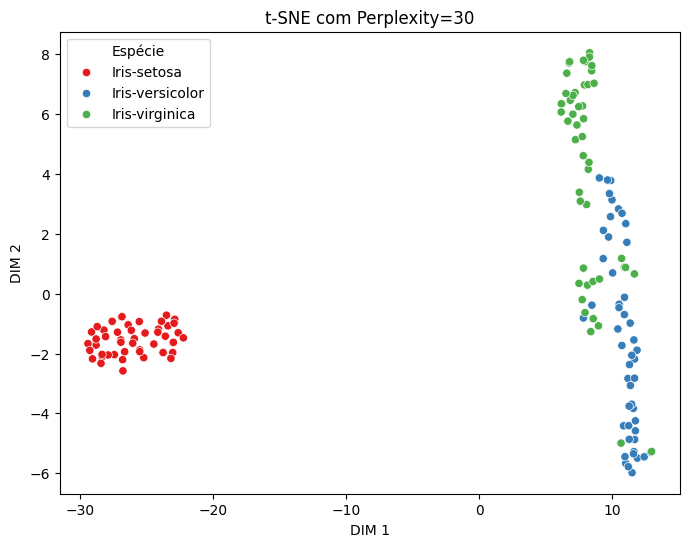

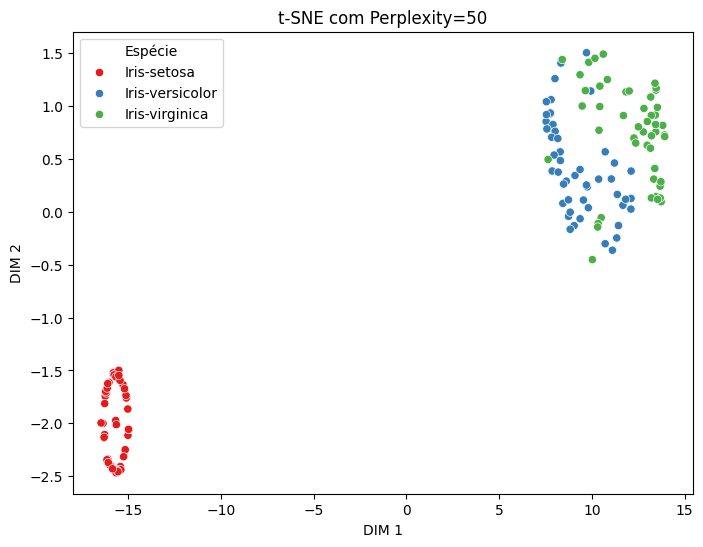

In [20]:
for perplexity in [5, 30, 50]:
    model = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_embedded = model.fit_transform(XTSNE_scaled)

    df = pd.DataFrame(X_embedded, columns=['DIM 1', 'DIM 2'])
    df['Espécie'] = YTSNE.values

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='DIM 1', y='DIM 2', hue='Espécie', palette='Set1')
    plt.title(f't-SNE com Perplexity={perplexity}')
    plt.show()